#  Vector Regressor definition and sample

In [2]:
import sklearn
from sklearn.svm import SVR
import numpy as np

class VectorRegression(sklearn.base.BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y):
        n, m = y.shape
        # Fit a separate regressor for each column of y
        self.estimators_ = [sklearn.base.clone(self.estimator).fit(X, y[:, i])
                               for i in range(m)]
        return self

    def predict(self, X):
        # Join regressors' predictions
        res = [est.predict(X)[:, np.newaxis] for est in self.estimators_]
        return np.hstack(res)

In [6]:
#Random values test
X = np.random.random((10,3))
y = np.random.random((10,2))
X2 = np.random.random((7,3))

#Regressor: scikit-learn estimator
clf = SVR()  
#clf = SVR(C=1.0, epsilon=0.2)

#Multidimensional regresor
r = VectorRegression(clf)
r.fit(X,y)

#Test trained regressor
y_pred = r.predict(X2)


#print("X", X)
#print("y", y)

print("X2", X2)
print("y_pred", y_pred)

('X2', array([[ 0.35687817,  0.63672379,  0.48184342],
       [ 0.21267318,  0.18908634,  0.07527389],
       [ 0.03312334,  0.49410753,  0.77905842],
       [ 0.95657016,  0.09404679,  0.46179397],
       [ 0.38296729,  0.31061565,  0.43331216],
       [ 0.89028876,  0.2228809 ,  0.65937166],
       [ 0.79359101,  0.86122121,  0.38152333]]))
('y_pred', array([[ 0.67945294,  0.47997069],
       [ 0.54426019,  0.50715984],
       [ 0.61307022,  0.68394435],
       [ 0.48138953,  0.34634653],
       [ 0.56663114,  0.51910496],
       [ 0.52283109,  0.39415069],
       [ 0.76493941,  0.2447229 ]]))


# Real data training

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import expanduser
import re 

#Load Data

date = "Oct18" # [Oct18 , Oct23 ]

matchMatrixes_Path = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/timeStampsAndMatchMatrixes')

train_path = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/train_'  + date)
test_path = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/test_'  + date)

labels_path =  os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/vel'  + date)

fileName = os.path.join(matchMatrixes_Path, "convensionMatrix_" + date + ".npy" )
matchMatrix = np.load(fileName)

all_names_train = os.listdir(train_path)


In [49]:
len(all_names_train)

2400

In [59]:
X = []
Y = []

for name in all_names_train:
    identifierMap = int(re.findall('\d+', name )[0])
    
    feat_map = np.load(os.path.join(train_path, name))
        
    identifierVel = matchMatrix[np.where(matchMatrix == identifierMap)[0][0],1]
    
    label = np.load(os.path.join(labels_path, "vel_"+str(identifierVel+1) + ".npy")) #+1 it's Because Vel names were saved starting from 1 instead of 0  
    
    X.append(feat_map.flatten())
    Y.append(label)


In [60]:
X = np.array(X)
Y = np.array(Y)
print "Shape X: " + str(X.shape)
print "Shape Y: " + str(Y.shape)

Shape X: (2400, 92160)
Shape Y: (2400, 2)


In [61]:
#Regressor: scikit-learn estimator
clf = SVR()  
#clf = SVR(C=1.0, epsilon=0.2)

#Multidimensional regresor
r = VectorRegression(clf)
r.fit(X,Y)

VectorRegression(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

In [4]:
#Save & load model
import cPickle
# save the classifier
#with open('VectorRegressor.pkl', 'wb') as fid:
#    cPickle.dump(r, fid)    

# load it again
with open('VectorRegressor.pkl', 'rb') as fid:
    r_loaded = cPickle.load(fid)
    

In [6]:
#TEST

X = []
Y = []

all_names_test = os.listdir(test_path)

for name in all_names_test:
    identifierMap = int(re.findall('\d+', name )[0])
    
    feat_map = np.load(os.path.join(test_path, name))
        
    identifierVel = matchMatrix[np.where(matchMatrix == identifierMap)[0][0],1]
    
    label = np.load(os.path.join(labels_path, "vel_"+str(identifierVel+1) + ".npy")) #+1 it's Because Vel names were saved starting from 1 instead of 0  
    
    X.append(feat_map.flatten())
    Y.append(label)
    
X = np.array(X)
Y = np.array(Y)
print "Shape X: " + str(X.shape)
print "Shape Y: " + str(Y.shape)

Shape X: (600, 92160)
Shape Y: (600, 2)


In [7]:
#Test trained regressor
Y_pred = r_loaded.predict(X)

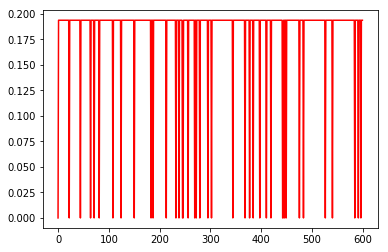

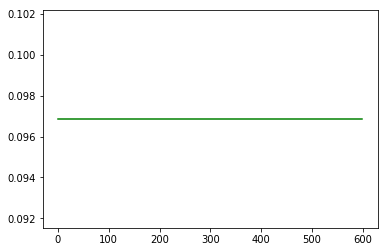

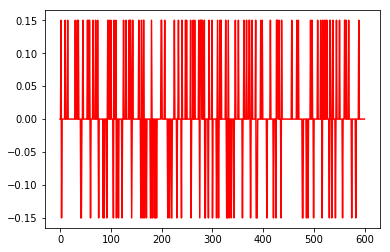

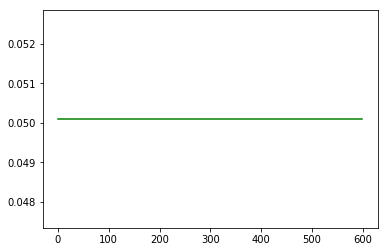

In [16]:
plt.plot(Y[:,0], 'r-')
#plt.ylabel("X linear vel")
plt.show()

plt.plot(Y_pred[:,0], 'g-')
#plt.ylabel("Z angular vel")
plt.show()

plt.plot(Y[:,1], 'r-')
#plt.ylabel("X linear vel")
plt.show()

plt.plot(Y_pred[:,1], 'g-')
#plt.ylabel("Z angular vel")
plt.show()

In [18]:
Y

array([[ 0.        ,  0.        ],
       [ 0.19371024,  0.        ],
       [ 0.19371024,  0.15009464],
       ..., 
       [ 0.19371024,  0.        ],
       [ 0.19371024,  0.        ],
       [ 0.19371024,  0.        ]])

In [17]:
Y_pred

array([[ 0.09685512,  0.05009464],
       [ 0.09685512,  0.05009464],
       [ 0.09685512,  0.05009464],
       ..., 
       [ 0.09685512,  0.05009464],
       [ 0.09685512,  0.05009464],
       [ 0.09685512,  0.05009464]])

In [19]:
#Accuracy calculation 
diff = Y - Y_pred
percent = 100.*(np.where((diff == 0) | (abs(diff)<1e-05))[0].shape[0])
percent

0.0

# Initial experiments

In [3]:
#---------------------
#Example predicting pair numbers

X =  np.array([[0, 1 , 2] , [6, 7, 8],[0, 1 , 2 ] , [ 6, 7, 8]])
y =  np.array([[2 , 4 , 6 ] , [14 , 16 , 18], [2 , 4 , 6] , [14 , 16 , 18]])
X2 = np.array([[3 ,4 , 5], [3 ,4 , 5]])
#Regressor: scikit-learn estimator
clf = SVR()
#Multidimensional regresor
r = VectorRegression(clf)
r.fit(X,y)

#Test trained regressor
y_pred = r.predict(X2)


print("X", X)
print("y", y)

print("X2", X2)
print("y_pred", y_pred)


('X', array([[0, 1, 2],
       [6, 7, 8],
       [0, 1, 2],
       [6, 7, 8]]))
('y', array([[ 2,  4,  6],
       [14, 16, 18],
       [ 2,  4,  6],
       [14, 16, 18]]))
('X2', array([[3, 4, 5],
       [3, 4, 5]]))
('y_pred', array([[  8.,  10.,  12.],
       [  8.,  10.,  12.]]))


# ------------------------------------------
Real feature maps

In [4]:
import numpy as np
from sklearn.svm import SVR
import cv2
import os

path = "examp_feat_maps/"

feat_names = os.listdir(path)
all_feat = []
#Read images
for filename in feat_names:
    #Load feature map
    array = np.load(os.path.join(path, filename)) 
    xi = array.flatten()
    
    all_feat.append(xi)
    
all_feat = np.asarray(all_feat)

print("Examples shape:" , all_feat.shape)

('Examples shape:', (26, 92160))


In [6]:
import math

#Test feature maps
#Front: [1 , 0 ] 
#Right: [math.cos(10) , math.sin(10)]
#Left: [math.cos(170) , math.sin(170)]

y =  np.array([[1 , 0 ], 
               [math.cos(10) , math.sin(10)], 
               [1 , 0 ],
               [math.cos(170) , math.sin(170)], 
               [1 , 0 ], 
               [1 , 0 ], 
               [1 , 0 ],
               [math.cos(10) , math.sin(10)], 
               [1 , 0 ], 
               [1 , 0 ], 
               [math.cos(10), math.sin(10)],
               [math.cos(10) , math.sin(10)],
               [math.cos(10) , math.sin(10)],  
               [1 , 0 ], 
               [1 , 0 ], 
               [math.cos(10) , math.sin(10)],
               [1 , 0 ],
               [math.cos(170) , math.sin(170)],
               [math.cos(10) , math.sin(10)],
               [1 , 0 ],
               [1 , 0 ],
               [math.cos(170) , math.sin(170)],
               [math.cos(170) , math.sin(170)],
               [1 , 0 ],
               [math.cos(170) , math.sin(170)] ])#,
               #[1 , 0 ]]) 
print(y .shape)
y

(25, 2)


array([[ 1.        ,  0.        ],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 0.93799475,  0.34664946],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [-0.83907153, -0.54402111],
       [-0.83907153, -0.54402111],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 0.93799475,  0.34664946],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.93799475,  0.34664946],
       [ 0.93799475,  0.34664946],
       [ 1.        ,  0.        ],
       [ 0.93799475,  0.34664946]])

In [7]:
X = all_feat[0:-1,:]

print(X .shape)

#Regressor: scikit-learn estimator
clf = SVR()
#Multidimensional regresor
r = VectorRegression(clf)
r.fit(X,y)

(25, 92160)


VectorRegression(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

In [8]:
#Predict output for the last example which was not included in training
y_pred = r.predict(X[-1, :])
y_pred

/home/mcalvarez/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/mcalvarez/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.83792907,  0.20846471]])

In [9]:
#Accuracy calculation 
diff = y - y_pred
percent = 100.*(np.where((diff == 0) | (abs(diff)<1e-05))[0].shape[0])
percent

0.0

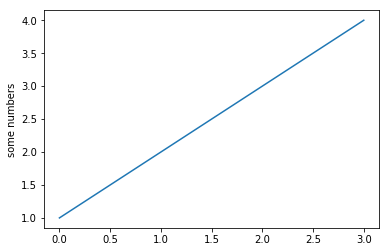

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()